# Lab-1:

> Importing the necessary libraries:

In [134]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
sb.set_theme(color_codes=True)
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [135]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

> There are no missing values in the dataset

<AxesSubplot:xlabel='wt', ylabel='mpg'>

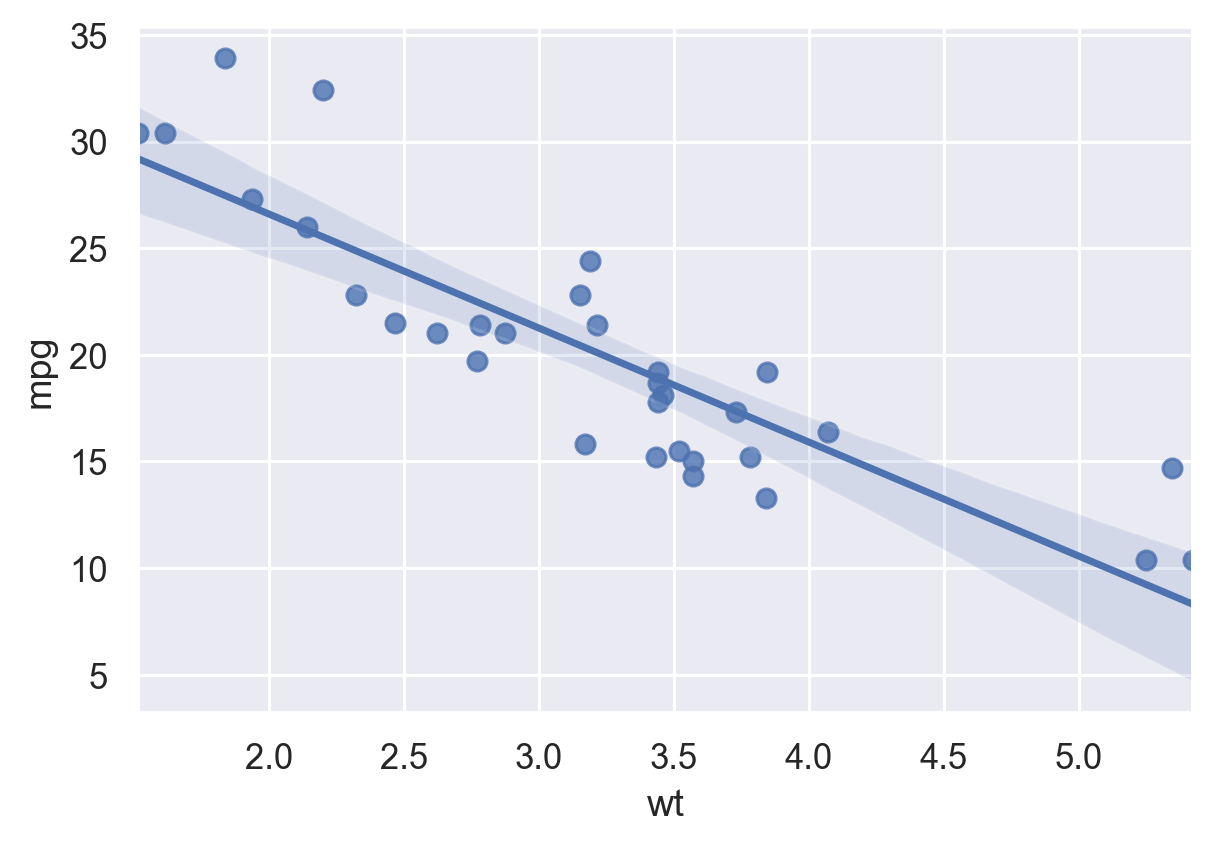

In [136]:
sb.regplot(x=df["wt"],y=df["mpg"],data=df)

> The above graph shows us a plot of the weight of the car versus the mpg of the car.

# Exercise 1:

# Question 1: Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

> Function for Linear Regression coefficients:

In [137]:
def myFnLinReg(x,y):
    size = np.size(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(np.square(x))
    sum_xy = np.sum(np.multiply(x,y))

    a = ((size*sum_xy)-(sum_x*sum_y))/((size*sum_x2)-(sum_x)*(sum_x))
    b = ((sum_y*sum_x2)-(sum_x*sum_xy))/((size*sum_x2)-(sum_x)*(sum_x))

    return a,b


# Question 2: Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

> Function to build a Linear Regression model given the coefficient of regression:

In [138]:
def build_model(a,b):
    def func(x):
        y = a*x+b
        return y
    return func

In [139]:
train = df.sample(frac=0.8, random_state=25)
test = df.drop(train.index)


In [140]:
x_train = train['wt']
y_train = train['mpg']
a,b = myFnLinReg(x_train,y_train)
a,b

(-5.323330840988169, 37.53992696910246)

In [141]:
mpg_model = build_model(a,b)

# Question 3:  What is the mpg of a car, whose weight is 5.5?

In [142]:
mpg_model(5.5)

8.261607343667528

> The mpg of a car whose weight is 5.5 units is 8.26160 units

# Question 4: Compute and print accuracy measures such as RMSE and R2 for the test set.

> Function to compute RMSE:

In [143]:
def RMSE(y_test, y_pred):
    diff_sq = []
    size = y_test.size
    for i in range(size):
        diff_sq.append(pow((y_pred[i]-y_test[i]),2))
    return pow((np.sum(diff_sq)/size),0.5)


> Function to compute R-Square:

In [144]:
def R_Square(y_test, y_pred):
    size = np.size(y_test)
    sum_x = np.sum(y_test)
    sum_y = np.sum(y_pred)
    sum_x2 = np.sum(np.square(y_test))
    sum_y2 = np.sum(np.square(y_pred))
    sum_xy = np.sum(np.multiply(y_test,y_pred))

    r2 = ((size*sum_xy)-(sum_x*sum_y))/pow((((size*sum_x2)-(sum_x*sum_x))*((size*sum_y2)-(sum_y*sum_y))),0.5)
    return r2

In [145]:
x_test = test['wt'].to_numpy()
y_test = test['mpg'].to_numpy()
y_pred = []

for i in range(x_test.size):
    y_pred.append(mpg_model(x_test[i]))

RMSE(y_test, y_pred)

2.7890195664413575

In [146]:
R_Square(y_pred,y_test)

0.9055812403263075

> The RMSE obtained is 2.7890 and the R-Square obtained is 0.905581

# Question 5: Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

> Function for Stochastic Gradient Descent:

In [147]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):

    m, b = 0.5, 0.5
    log, mse = [], []
    
    for _ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size)
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        f = ys - (m*Xs + b)
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

MSE: 9.038390106386153


C:\Users\Ronan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-148-7fcdddf21400>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('SGD Optimization', fontSize=14)
<ipython-input-148-7fcdddf21400>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', fontSize=11)
<ipython-input-148-7fcdddf21400>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('MSE', fontSize=11)


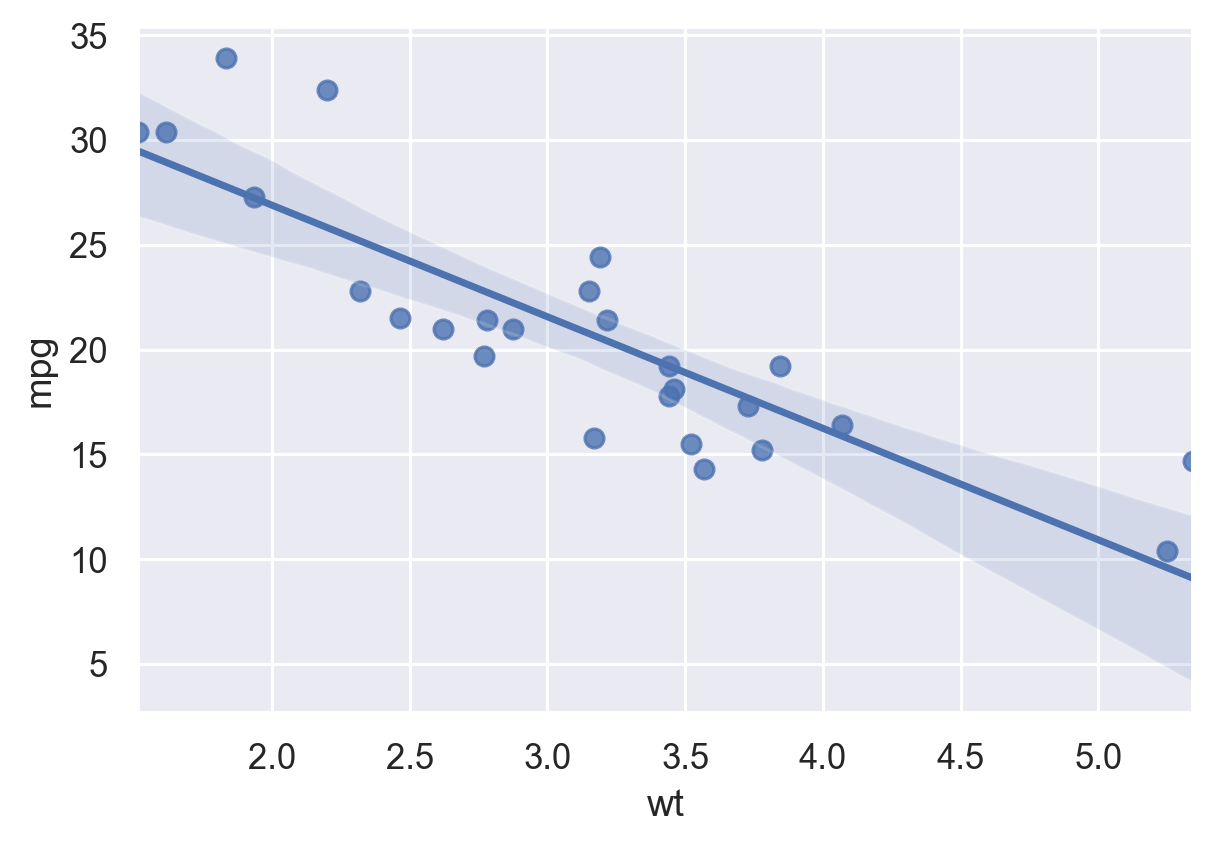

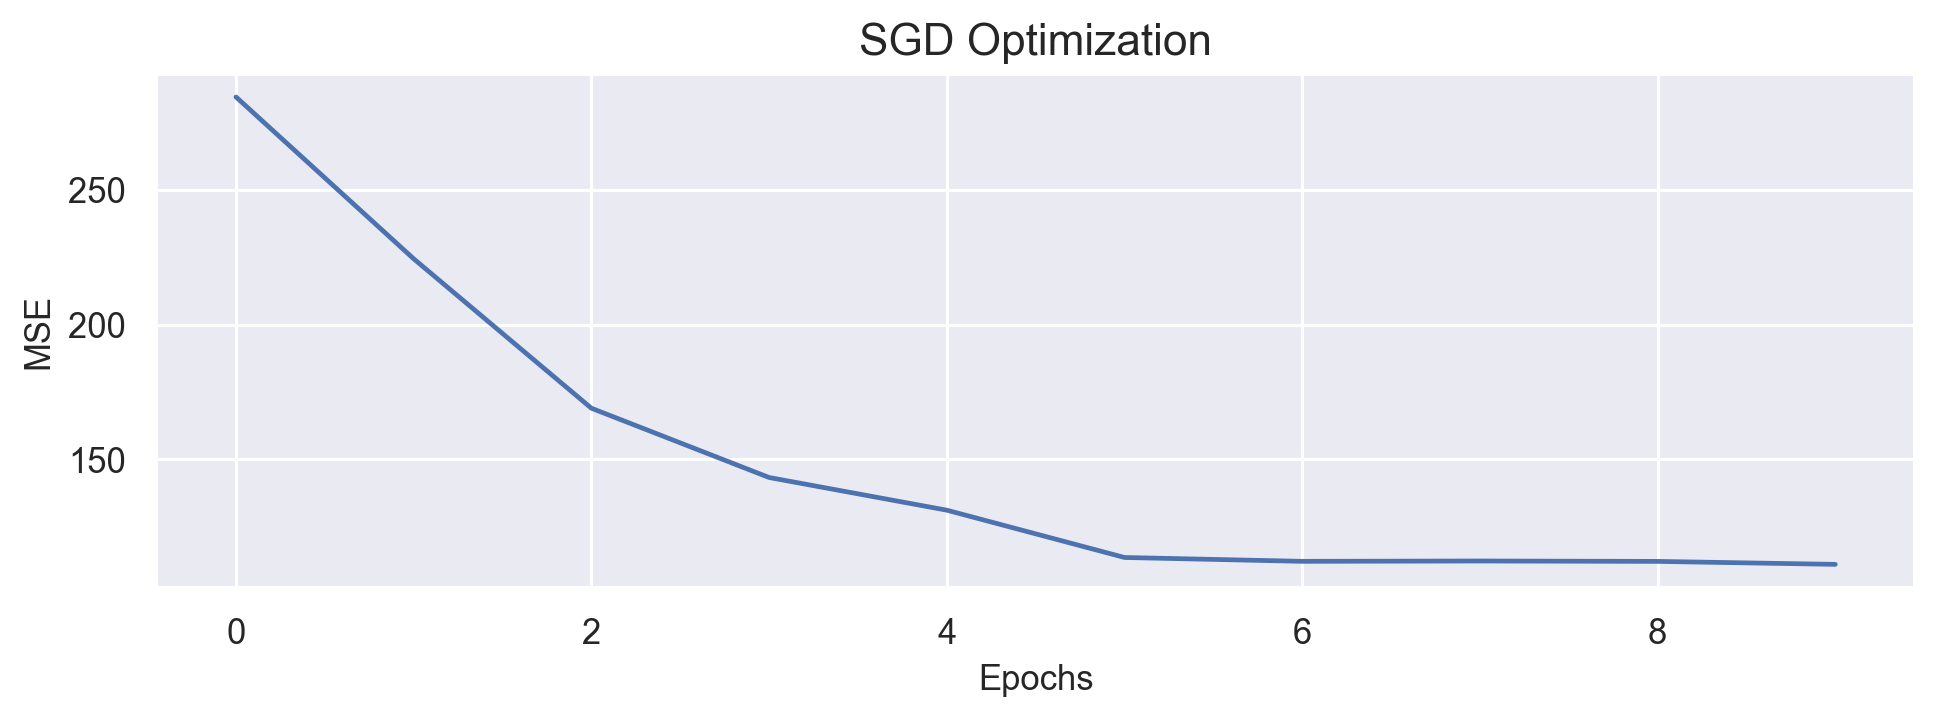

In [148]:
m, b, log, mse = SGD(x_train, y_train, lr=0.01, epoch=10, batch_size=2)
y_pred = mpg_model(x_train)

print("MSE:",mean_squared_error(y_train, y_pred))
sb.regplot(x_train,y_train)

plt.figure(figsize=(10,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()